# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
import time
import pickle
import warnings
from scipy import interp
from pprint import pprint
from scipy.stats import norm
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

warnings.filterwarnings("ignore")


# Importando e tratando dados

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/letpires/7DaysOfCodeSpotifyML/main/dataset.csv', index_col=0)
dados.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
# verificando o tamanho do dataset

dados.shape

(114000, 20)

In [4]:
# verificando todas as colunas do dataset

dados.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [5]:
# verificando os tipos

dados.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [7]:
# verificando a presença de dados nulos

dados.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
# verificando a presença de dados ausentes

dados.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
dados_limpos = dados.dropna()

In [10]:
# verificando a presença de dados deplicados

dados_limpos.duplicated().sum()

450

In [11]:
# removendo os dados duplicados

dados_tratados = dados_limpos.drop_duplicates()

In [12]:
# verificando se existe mais alguma inconsistência, como valores mínimos e máximos inesperados

print(dados_tratados.describe())

          popularity   duration_ms   danceability         energy  \
count  113549.000000  1.135490e+05  113549.000000  113549.000000   
mean       33.324433  2.280814e+05       0.567031       0.642091   
std        22.283855  1.064131e+05       0.173409       0.251053   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.741840e+05       0.456000       0.473000   
50%        35.000000  2.130000e+05       0.580000       0.685000   
75%        50.000000  2.615880e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113549.000000  113549.000000  113549.000000  113549.000000   
mean        5.309452      -8.243408       0.637866       0.084674   
std         3.560147       5.011422       0.480620       0.105762   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000      -9.998000       

# Explorando os dados

In [13]:
# verificando a duração média das músicas

duracao_media = dados_tratados['duration_ms'].mean()/60000
print('Duração média das músicas:', "%.2f" % duracao_media, 'minutos')


Duração média das músicas: 3.80 minutos


In [14]:
# verificando as músicas mais populares

top_30 = dados_tratados.nlargest(30, 'popularity')[['track_name', 'artists', 'popularity']]
top_30 = top_30.reset_index(drop=True)
display(top_30)


,track_name,artists,popularity
0,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
1,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
2,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
3,I'm Good (Blue),David Guetta;Bebe Rexha,98
4,I'm Good (Blue),David Guetta;Bebe Rexha,98
5,La Bachata,Manuel Turizo,98
6,La Bachata,Manuel Turizo,98
7,I'm Good (Blue),David Guetta;Bebe Rexha,98
8,La Bachata,Manuel Turizo,98
9,La Bachata,Manuel Turizo,98


Na tabela acima verifiquei que existem várias músicas repetidas no dataset, mesmo depois dos dados duplicados terem sido retirados. Irei, então, buscar uma música repetida para entender o que está acontecendo.

In [15]:
dados_tratados[dados_tratados['track_name'] == 'Unholy (feat. Kim Petras)']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,pop


O dataset, como podemos ver acima, tem músicas repetidas pois possui gêneros diferentes associados. Essa diferença na coluna "track_genre" foi o motivo das linhas não terem sido removidas quando eliminei os valores duplicados. Irei refazer a tabela deixando apenas a primeira aparição de cada música.

In [16]:
# verificando as músicas mais populares

top_30 = dados_tratados.nlargest(75, 'popularity')[['track_name', 'artists', 'popularity']]
top_30 = top_30.drop_duplicates(subset='track_name', keep='first').reset_index(drop=True)
display(top_30)


,track_name,artists,popularity
0,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
1,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
2,I'm Good (Blue),David Guetta;Bebe Rexha,98
3,La Bachata,Manuel Turizo,98
4,Me Porto Bonito,Bad Bunny;Chencho Corleone,97
5,Tití Me Preguntó,Bad Bunny,97
6,Under The Influence,Chris Brown,96
7,Efecto,Bad Bunny,96
8,I Ain't Worried,OneRepublic,96
9,Ojitos Lindos,Bad Bunny;Bomba Estéreo,95


In [17]:
# verificando o gênero com mais "danceability"

genero_danceability = dados_tratados.groupby('track_genre')['danceability'].mean().sort_values(ascending=False).head(5)
print(genero_danceability)


track_genre
kids             0.778630
chicago-house    0.766240
reggaeton        0.758521
latino           0.757396
reggae           0.745331
Name: danceability, dtype: float64


In [18]:
# verificando os artistas mais populares

top_artistas = dados_tratados[['artists', 'popularity']]
artistas_pop = top_artistas.groupby("artists").mean().sort_values(by='popularity', ascending=False).reset_index()
artistas_pop = artistas_pop.head()
artistas_pop

,artists,popularity
0,Sam Smith;Kim Petras,100.0
1,Bizarrap;Quevedo,99.0
2,Manuel Turizo,98.0
3,Bad Bunny;Chencho Corleone,97.0
4,Bad Bunny;Bomba Estéreo,94.5


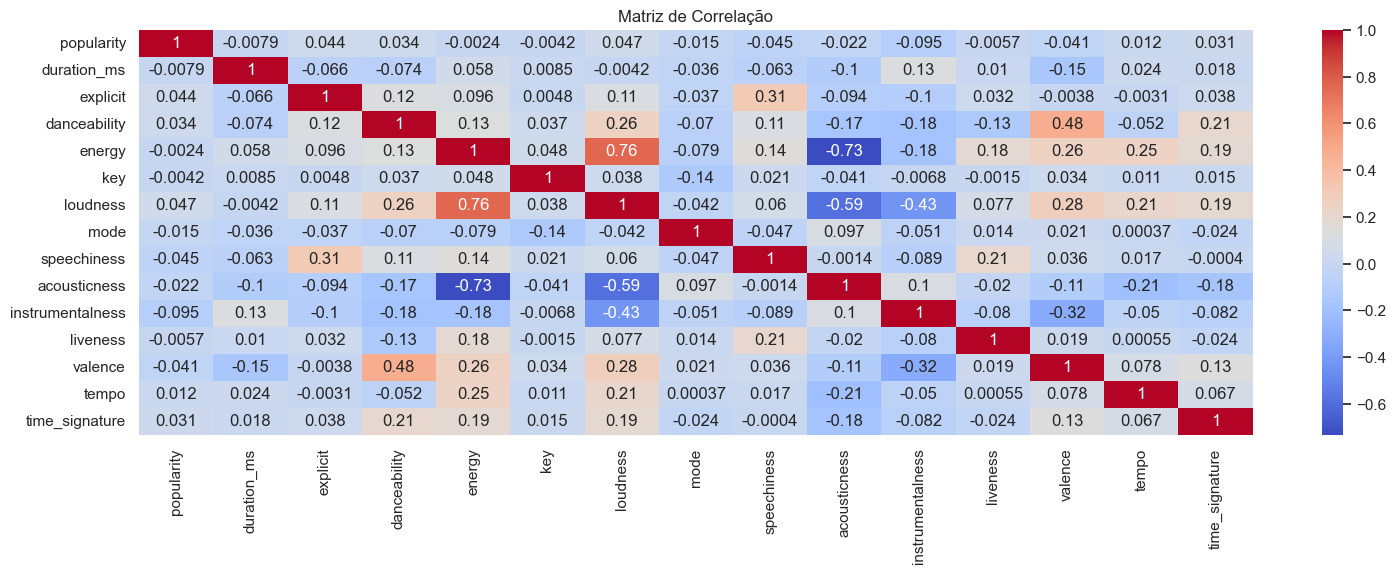

In [19]:
# criando um heatmap com as correlações entre as variáveis

corr = dados_tratados.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [21]:
# removendo as variáveis altamente correlacionadas

dados_tratados = dados_tratados.drop(['energy'], axis=1)

In [22]:
# transformando a variável "popularity" para uma variável binária

dados_tratados['popularity_bin'] = np.where(dados_tratados['popularity'] >= 80, 1, 0)

In [23]:
dados_tratados.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_bin
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


In [24]:
# removendo colunas que não são numéricas 

dados_tratados_sem_num = dados_tratados.select_dtypes(include='number')

In [25]:
# retirando a coluna de popularidade, já que ela já foi transformada em popularity_bin

dados_tratados_sem_num = dados_tratados_sem_num.drop(columns=['popularity'])

In [26]:
# verificando o tamanho do dataset após os tratamentos

dados_tratados_sem_num.shape

(113549, 13)

In [27]:
# normalizando os dados

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dados_norm = scaler.fit_transform(dados_tratados_sem_num)
dados_tratados_sem_num = pd.DataFrame(dados_norm, columns=dados_tratados_sem_num.columns)

In [28]:
# separando os dados para treino e teste

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(dados_tratados_sem_num, test_size=0.2, random_state=42, shuffle=True)

In [29]:
# dividindo X e y

from sklearn.model_selection import StratifiedKFold
X = df_train.drop('popularity_bin', axis=1)
y = df_train.popularity_bin

# separando os dados mantendo a porcentagem de amostras em cada classe

StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
# looping para separar os dados em treino e validação

for train_index, val_index in StratifKfold.split(X, y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [31]:
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')

Dimensões: ((72672, 12), (18167, 12), (72672,), (18167,))



In [32]:
# instanciando o modelo

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [33]:
# realizando as previsões

y_pred = lr.predict(X_train)
y_pred_val = lr.predict(X_val)

In [34]:
lr.coef_.tolist()[0]

[-1.242074349410123,
 2.4798801163736313,
 0.02365476369297737,
 2.8777047207882234,
 -0.06174952719417155,
 -0.5606933865606414,
 -1.2752291787369252,
 -2.799981276028344,
 -1.7292659011787612,
 -0.6586249550225876,
 -0.8216720769504934,
 -1.169693349025574]

In [35]:
df_coef = dados_tratados_sem_num.drop(columns='popularity_bin')
df_coef.columns

Index(['duration_ms', 'danceability', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [36]:
# verificando o quanto cada variável influencia no modelo

data = {"Features": df_coef.columns,
    "Coef": lr.coef_.tolist()[0]}

df = pd.DataFrame(data)
df

,Features,Coef
0,duration_ms,-1.242074
1,danceability,2.479880
2,key,0.023655
3,loudness,2.877705
4,mode,-0.061750
5,speechiness,-0.560693
6,acousticness,-1.275229
7,instrumentalness,-2.799981
8,liveness,-1.729266
9,valence,-0.658625


As variáveis "danceability" e "loudness" são as que mais influenciam a popularidade das músicas.

In [37]:
print('Nos dados de TREINO:')

print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_train, y_pred)}")
print(f"precision: {precision_score(y_train, y_pred)}")
print(f"recall:    {recall_score(y_train, y_pred)}")
print(f"f1:        {f1_score(y_train, y_pred)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('Nos dados de VALIDAÇÃO:')
print('---' * 20)
print('Modelo:    Regressão Logística (baseline)\n')
print(f"accuracy:  {accuracy_score(y_val, y_pred_val)}")
print(f"precision: {precision_score(y_val, y_pred_val)}")
print(f"recall:    {recall_score(y_val, y_pred_val)}")
print(f"f1:        {f1_score(y_val, y_pred_val)}")
print('---' * 20)

Nos dados de TREINO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9894044473800088
precision: 0.0
recall:    0.0
f1:        0.0

------------------------------------------------------------
------------------------------------------------------------

Nos dados de VALIDAÇÃO:
------------------------------------------------------------
Modelo:    Regressão Logística (baseline)

accuracy:  0.9894313865800628
precision: 0.0
recall:    0.0
f1:        0.0
------------------------------------------------------------


In [38]:
# verificando a quantidade de dados de cada classe

y_val = pd.Series(y_val)
print(y_val.value_counts())

0.0    17975
1.0      192
Name: popularity_bin, dtype: int64


In [39]:
# criando um dicionário com os classificadores

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

### Random UnderSampling

In [40]:
# instanciando o método
undersample = NearMiss()

# transformando o conjunto de dados
X_under, y_under = undersample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under)
print(counter)

Counter({0.0: 770, 1.0: 770})


In [41]:
# verificando as métricas de cada modelo

for nome, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.18891396488137832
precision: 0.009113616418011207
recall:    0.703125
f1:        0.017994001999333556
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.16485936037870866
precision: 0.009302935010482181
recall:    0.7395833333333334
f1:        0.01837474120082816
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.17383167281334289
precision: 0.01121593982978162
recall:    0.8854166666666666
f1:        0.022151280213694703
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.034182859030109536
precision: 0.010493061040279816
recall:    0.96875
f1:        0.020761245674740487
------------------------------------------

### Random over-sampling

In [42]:
# instanciando o método
oversample = RandomOverSampler(sampling_strategy='minority')

# transformando o conjunto de dados
X_over, y_over = oversample.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_over)
print(counter)

Counter({0.0: 71902, 1.0: 71902})


In [43]:
# verificando os resultados dos modelos

for nome, model in classifiers.items():
    
    model.fit(X_over, y_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.595695491825838
precision: 0.019610476830087306
recall:    0.7604166666666666
f1:        0.038234908995678926
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9807893433148016
precision: 0.29396325459317585
recall:    0.5833333333333334
f1:        0.39092495636998253
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9832113172235372
precision: 0.34173669467787116
recall:    0.6354166666666666
f1:        0.4444444444444445
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.988220399625695
precision: 0.4576923076923077
recall:    0.6197916666666666
f1:        0.5265486725663716
-----------------------------------

### Over-sampling

In [44]:
# instanciando o método
oversample_smote = SMOTE(sampling_strategy='minority')

# transformando o conjunto de dados
X_smote, y_smote = oversample_smote.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_smote)
print(counter)

Counter({0.0: 71902, 1.0: 71902})


In [45]:
# verificando os resultados para cada modelo

for nome, model in classifiers.items():
    
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.6168327186657125
precision: 0.01999716352290455
recall:    0.734375
f1:        0.03893414331078282
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9466615291462542
precision: 0.11724137931034483
recall:    0.6197916666666666
f1:        0.1971830985915493
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9664776793086365
precision: 0.17370892018779344
recall:    0.578125
f1:        0.2671480144404332
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9887158033797545
precision: 0.47257383966244726
recall:    0.5833333333333334
f1:        0.5221445221445221
-------------------------------------------------------

### Híbrido: oversampling e undersampling

In [46]:
# transformando o conjunto de dados
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# instanciando um pipeline com os dois métodos
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# transformando o conjunto de dados
X_under_over, y_under_over = pipeline.fit_resample(X_train, y_train)

# resumindo a distribuição da nova classe
counter = Counter(y_under_over)
print(counter)

Counter({0.0: 14380, 1.0: 7190})


In [47]:
for nome, model in classifiers.items():
    
    model.fit(X_under_over, y_under_over)
    y_pred = model.predict(X_val)
    
    print(f'Modelo:    {nome}\n')
    print(f"accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"precision: {precision_score(y_val, y_pred)}")
    print(f"recall:    {recall_score(y_val, y_pred)}")
    print(f"f1:        {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Modelo:    LogisiticRegression

accuracy:  0.8682226014201574
precision: 0.020887728459530026
recall:    0.25
f1:        0.03855421686746988
------------------------------------------------------------
------------------------------------------------------------
Modelo:    KNearest

accuracy:  0.9112126383002147
precision: 0.07883817427385892
recall:    0.6927083333333334
f1:        0.14156466205428417
------------------------------------------------------------
------------------------------------------------------------
Modelo:    DecisionTreeClassifier

accuracy:  0.9581659052127484
precision: 0.15024630541871922
recall:    0.6354166666666666
f1:        0.24302788844621515
------------------------------------------------------------
------------------------------------------------------------
Modelo:    Random Forest

accuracy:  0.9876699510100732
precision: 0.4411764705882353
recall:    0.625
f1:        0.5172413793103449
------------------------------------------------------------

O modelo que obteve a melhor performace foi o Randon Forest, com o método de balanceamento Randon over-sampling.

### Ajustando o modelo selecionado

In [48]:
# seleção de hiperparâmetros

n_estimators = [3,5,10,100]
max_features = [3,4,5,6,None]
max_depth = [3,4,5,6,None]
class_weight = ['balanced',None]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}


print(random_grid)

{'n_estimators': [3, 5, 10, 100], 'max_features': [3, 4, 5, 6, None], 'max_depth': [3, 4, 5, 6, None], 'class_weight': ['balanced', None]}


In [49]:
# transformando os dados

X_train_array = X_train.values
X_val_array = X_val.values
y_train_array = y_train.values
y_val_array = y_val.values

### Aplicando validação cruzada com hiperparâmetros otimizados e métricas de desempenho

In [50]:
# definindo listas vazias para receber os resultados da validação cruzada
accuracy_lst_rf = []
precision_lst_rf = []
recall_lst_rf = []
f1_lst_rf = []
auc_lst_rf = []


# instanciando o RandomizedSearchCV para validação cruzada com o grid de parametros
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

# iniciando o tempo e contador para o loop
start = time.time()
count = 0

# looping para a validação cruzada
for train, test in StratifKfold.split(X_train_array, y_train_array):
    
    # instanciando o pipeline com técnica de reamostragem
    pipeline_rf = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), rf_grid)
    
    # executando o pipeline para treinar o modelo
    model_rf = pipeline_rf.fit(X_train_array[train], y_train_array[train])
    
    # identificando os melhores parâmetros no treinamento
    best_est_rf = rf_grid.best_estimator_
    
    # realizando as previsões com o resultado do treinamento
    prediction_rf = best_est_rf.predict(X_train_array[test])
    
    # armazenando os resultados
    accuracy_lst_rf.append(pipeline_rf.score(X_train_array[test], y_train_array[test]))
    precision_lst_rf.append(precision_score(y_train_array[test], prediction_rf))
    recall_lst_rf.append(recall_score(y_train_array[test], prediction_rf))
    f1_lst_rf.append(f1_score(y_train_array[test], prediction_rf))
    auc_lst_rf.append(roc_auc_score(y_train_array[test], prediction_rf))
    
    # identificando em qual loop está
    count = count + 1
    print(f"kfold nº: {count}")
    
    # medindo o tempo de cada loop
    intervalo = time.time()
    print(f"tempo intermediário: {(intervalo - start)/60:.1f} minutos")
    print()

print('---' * 20)
print(f"melhores estimadores para RF: {rf_grid.best_params_}")

# imprimindo a média dos resultados da validação cruzada
print('---' * 20)
print('Resultados')
print(f"accuracy:  {np.mean(accuracy_lst_rf)}")
print(f"precision: {np.mean(precision_lst_rf)}")
print(f"recall:    {np.mean(recall_lst_rf)}")
print(f"f1:        {np.mean(f1_lst_rf)}")
print(f"AUC:       {np.mean(auc_lst_rf)}")
print('---' * 20)

# imprimindo o tempo total da validação cruzada
end = time.time()
print(f"Tempo do loop para validação cruzada: {(end - start)/60:.1f} minutos")

kfold nº: 1
tempo intermediário: 5.3 minutos

kfold nº: 2
tempo intermediário: 10.7 minutos

kfold nº: 3
tempo intermediário: 16.2 minutos

kfold nº: 4
tempo intermediário: 21.6 minutos

kfold nº: 5
tempo intermediário: 26.7 minutos

------------------------------------------------------------
melhores estimadores para RF: {'n_estimators': 100, 'max_features': 6, 'max_depth': None, 'class_weight': 'balanced'}
------------------------------------------------------------
Resultados
accuracy:  0.9877119136893059
precision: 0.4356783105162993
recall:    0.5415584415584416
f1:        0.48261136923848785
AUC:       0.7670241091678273
------------------------------------------------------------
Tempo do loop para validação cruzada: 26.7 minutos


### Curva ROC

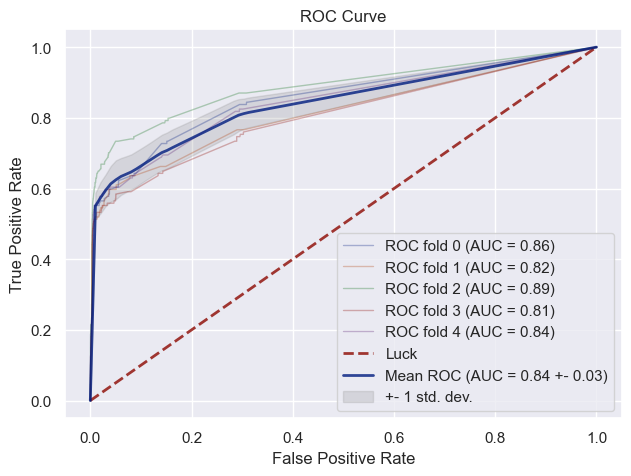

In [51]:
# criando uma função para plotar o gráfico
def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    # definindo algumas listas vazias para receber o resultado
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # definindo o contador
    i = 0
    
    # loop ara validação cruzada
    for train, test in cv.split(X, y):
        
        # executando a função e armazenando as probabilidade dos resultados
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        # computando a curva ROC e AUC
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # plotando a curva ROC da validação cruzada em individualmente
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    
    # plotando a linha diagonal como referência da taxa de 50/50
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # calculando as médias e desvio padrão
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # plotando curva ROC com a média dos resultados
    plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f +- %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'+- 1 std. dev.')
    
    # customizando o gráfico
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    
    # exibindo o gráfico
    plt.show()
    
# executando função e plotando a Curva ROC AUC
draw_cv_roc_curve(best_est_rf, StratifKfold, X_train, y_train, title='ROC Curve')

# Modelo final

In [52]:
# separando novamente os dados
X_all = df_train.drop('popularity_bin', axis=1)
y_all = df_train.popularity_bin

# instanciando o modelo final com os parametros encontrados na validação cruzada
final_model = rf_grid.best_estimator_

# definindo o pipeline para reamostragem oversampling e o modelo final
pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), final_model)

# treinando o modelo com os parametros ajustados com todos os dados
model = pipeline.fit(X_all, y_all)

In [53]:
model.steps[1]

('randomforestclassifier',
 RandomForestClassifier(class_weight='balanced', max_features=6))

In [54]:
lista = model.steps[1][1].feature_importances_

In [55]:
print(lista.tolist())

[0.09632580437910428, 0.1043102110192469, 0.038258651524954015, 0.1364169141026526, 0.005873983612133166, 0.08961178418143897, 0.12193012526816827, 0.11732096548548408, 0.09918602731861928, 0.1008627088887569, 0.08414394308411721, 0.005758881135324095]


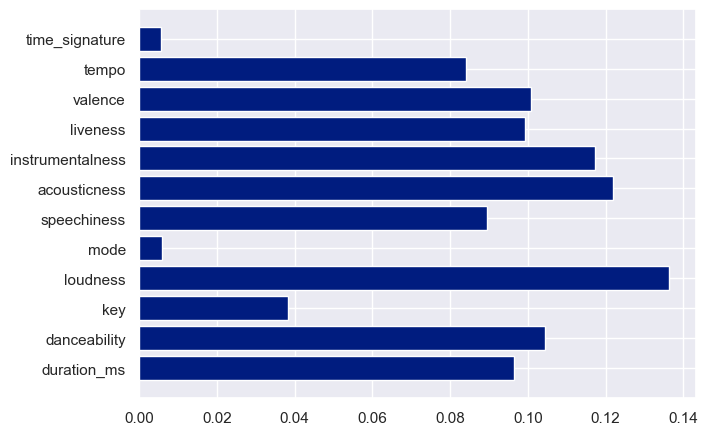

In [56]:
# lista de nomes
nomes = dados_tratados_sem_num.columns

plt.barh(dados_tratados_sem_num.drop(columns=['popularity_bin']).columns.tolist(), lista.tolist())

plt.show()

# Preparação, previsão e avaliação nos dados de teste

In [57]:

# separando os dados de teste
X_test = df_test.drop('popularity_bin', axis=1)
y_test = df_test.popularity_bin

# realizando as predições nos dados de teste
y_pred_test = model.predict(X_test)

# imprimindo os resultados
print(f"accuracy:  {accuracy_score(y_test, y_pred_test)}")
print(f"precision: {precision_score(y_test, y_pred_test)}")
print(f"recall:    {recall_score(y_test, y_pred_test)}")
print(f"f1:        {f1_score(y_test, y_pred_test)}")

accuracy:  0.987934830471158
precision: 0.4490358126721763
recall:    0.6877637130801688
f1:        0.5433333333333333


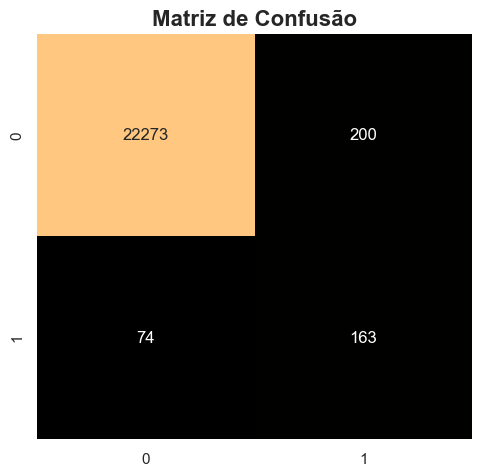

In [58]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Matriz de Confusão", fontsize=16, fontweight='bold')
plt.show()

In [60]:
pd.DataFrame(index=['Baseline', 'Validação', 'Teste'], 
             data = {"accuracy": [accuracy_score(y_val, y_pred_val), np.mean(accuracy_lst_rf), accuracy_score(y_test, y_pred_test)],
                     "precision": [precision_score(y_val, y_pred_val), np.mean(precision_lst_rf), precision_score(y_test, y_pred_test)],
                     "recall": [recall_score(y_val, y_pred_val), np.mean(recall_lst_rf), recall_score(y_test, y_pred_test)],
                     "f1": [f1_score(y_val, y_pred_val), np.mean(f1_lst_rf), f1_score(y_test, y_pred_test)]})

,accuracy,precision,recall,f1
Baseline,0.989431,0.000000,0.000000,0.000000
Validação,0.987712,0.435678,0.541558,0.482611
Teste,0.987935,0.449036,0.687764,0.543333


# Salvando

In [61]:
# salvando o modelo treinado no diretório atual
pkl_filename_model = "./RandomForestModel.pkl"
with open(pkl_filename_model, 'wb') as file:
    pickle.dump(model, file)

In [62]:
# armazenando as previsões no dataframe de teste
df_test['Predicted'] = y_pred_test

# comparando com real com o previsto no dataframe
df_test['Correct?'] = np.where(df_test['popularity_bin'] == df_test['Predicted'], 'Yes', 'No')

In [63]:
df_test.head()

,duration_ms,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_bin,Predicted,Correct?
77091,0.038236,0.433503,0.818182,0.786564,1.0,0.050466,0.577309,0.000000,0.9350,0.703518,0.346959,0.8,0.0,0.0,Yes
96328,0.018514,0.661929,0.181818,0.764904,1.0,0.036062,0.534137,0.000002,0.6020,0.932663,0.649721,0.8,0.0,0.0,Yes
6985,0.032000,0.581726,0.090909,0.842110,0.0,0.185492,0.000046,0.022200,0.2720,0.316583,0.468501,0.8,0.0,0.0,Yes
75085,0.052745,0.285279,0.363636,0.562418,0.0,0.034611,0.981928,0.883000,0.1030,0.207035,0.556169,0.6,0.0,0.0,Yes
61019,0.053683,0.409137,0.818182,0.865194,1.0,0.113990,0.032731,0.000000,0.0985,0.576884,0.730667,0.8,0.0,0.0,Yes
